Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.

In [1]:
def qZ(x, y):
    return (x + 3 * y) / (x ** 2 + y ** 2 + 1)


def qSumZ(Z):
    return sum(Z)


def exchangeScheme(oldX, oldY, sortedID):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedID[2]]
    X[3] = oldX[sortedID[2]]
    X[0] = oldX[sortedID[0]]
    X[1] = oldX[sortedID[1]]

    Y[0] = oldY[sortedID[2]]
    Y[1] = oldY[sortedID[2]]
    Y[2] = oldY[sortedID[0]]
    Y[3] = oldY[sortedID[1]]

    return X, Y


def sorting(Z):
    sortedID = sorted(range(len(Z)), key=lambda k: Z[k])
    return sortedID


def evoStep(X, Y, Z):
    _, minID = min((value, ID) for (ID, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minID)
    Y.pop(minID)
    Z.pop(minID)

    return X, Y, Z


def evoSteps(X, Y, stepsNum=4):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results


X = [-5, -3, -2, -1]
Y = [-1, -2, 0, 1]

results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i + 1} step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1 step: -0.6724867724867726
max_2 step: -1.7407407407407407
max_3 step: 0.35925925925925917
max_4 step: 1.4259259259259258
max Z: 0.6666666666666666


Задание
Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже.

Лучший выбранный маршрут: [1, 4, 6, 2, 3, 5, 1]
Длина лучшего выбранного маршрута: 169
Длины всех рассмотренных маршрутов: [146, 135, 163, 167, 169]


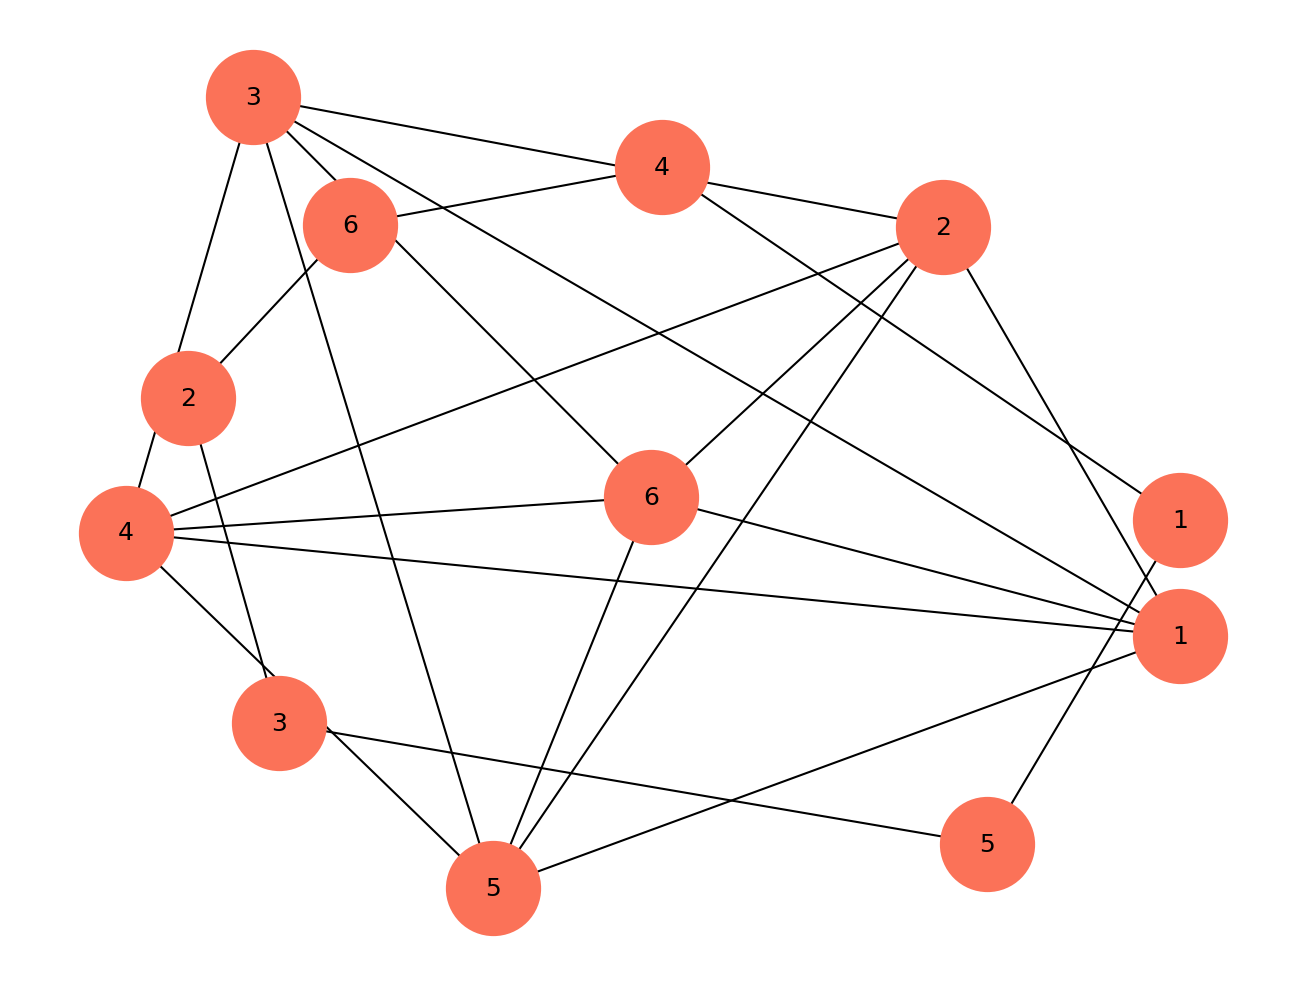

In [2]:
import networkx as nx # noqa E402
from math import e # noqa E402


distances = [(1, 2, 22),
             (1, 3, 43),
             (1, 4, 39),
             (1, 5, 28),
             (1, 6, 20),
             (2, 3, 26),
             (2, 4, 33),
             (2, 5, 36),
             (2, 6, 17),
             (3, 4, 22),
             (3, 5, 40),
             (3, 6, 24),
             (4, 5, 22),
             (4, 6, 19),
             (5, 6, 20)]

V = [1, 3, 4, 5, 6, 2, 1]
Z = [(2, 4),
     (4, 6),
     (3, 5),
     (5, 2)]
P = [51, 23, 29, 31]

T = 100


def probability(delta, T):
    return 100 * e ** (-delta / T)


def reductTemp(prevT):
    return 0.5 * prevT


graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color='#fb7258',
                     node_size=2000, with_labels=True)


def edgeLenghth(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or
                     (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1)
                    for item in distances])


def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLenghth(V[i], V[i + 1], distances))
    return sum(edges)


def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] =\
        arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV


def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V


def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
            else:
                V = newV
                sumLength = newS
        T = reductTemp(T)

    return V, arrSum


def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] \
            or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph1 = nx.Graph() 
    graph1.add_weighted_edges_from(newDistances) 

    nx.draw_kamada_kawai(graph1, node_color = '#fb7258', node_size = 2000, with_labels = True)


bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)